In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/src/')
#sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/src/')

from data import expand_dicts
from features import build_features

In [3]:
df = pd.read_pickle('../data/raw/model_df.pkl')

In [5]:
df['joined_tags'] = df.tags.apply(lambda x: ' '.join(x))

In [8]:
df

,modeler,modeler_response,modeler_ratings,tags,views,likes,review_count,comments,price,pic_count,model_description,model_details,price_usd,tag_count,response_time,joined_tags
0,andriy115599,"{'percent': 100, 'time': '5.0h'}","{'avg_rating': 3.9, 'num_rating': 14}","[accessorie, appliance, barazza, furniture, ki...",351,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$6.00,30,High quality 3d models of Barazza. The models ...,"{'model_id': '801556', 'geometry': 'Subdivisio...",6.00,7,5.0,accessorie appliance barazza furniture kitchen...
1,sinartur,"{'percent': 0, 'time': 0}","{'avg_rating': 0, 'num_rating': 0}","[bed, furniture, pillow, comfort, modern, styl...",96,1,0,"{'authors': ['GGAF'], 'texts': ['cool'], 'date...",$14.99,10,This 3d model Lipende sofa has a fully texture...,"{'model_id': '2095846', 'geometry': 'Polygon m...",14.99,19,0.0,bed furniture pillow comfort modern stylishsof...
2,hq3dmodel,"{'percent': 0, 'time': 0}","{'avg_rating': 5.0, 'num_rating': 1}","[rug, carpet, fur, interior, floor, cloth, woo...",15,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$5.00,8,The set consists of 3 rugs. All high quality t...,"{'model_id': '2418972', 'geometry': 'Polygon m...",5.00,20,0.0,rug carpet fur interior floor cloth wool reali...
3,-snake-,"{'percent': 0, 'time': 0}","{'avg_rating': 0, 'num_rating': 0}","[aquanet, modena, furniture, sink, mixer, mirr...",19,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$7.00,9,Furniture set Modena 65/85/100 White gloss. Di...,"{'model_id': '2372429', 'geometry': 'Polygon m...",7.00,18,0.0,aquanet modena furniture sink mixer mirror dra...
4,zifir3d,"{'percent': 88, 'time': '0.2h'}","{'avg_rating': 4.7, 'num_rating': 33}","[flexform, ettore, sofa, divan, lounge, pillow...",77,2,0,"{'authors': [], 'texts': [], 'datetimes': []}",$39.00,8,Flexform Ettore https://www.flexform.it/en/pro...,"{'model_id': '2251378', 'geometry': 'Polygon m...",39.00,21,0.2,flexform ettore sofa divan lounge pillow secti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,aviato,"{'percent': 100, 'time': '68.5h'}","{'avg_rating': 4.3, 'num_rating': 7}","[sink, washbasin, stone, oval, invoice, marble...",43,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$13.00,5,Stone sink and faucet Grohe Atrio 32129 Suitab...,"{'model_id': '2252178', 'geometry': 'Polygon m...",13.00,10,68.5,sink washbasin stone oval invoice marble art m...
996,ikhlasmiftah,"{'percent': 67, 'time': '26.3h'}","{'avg_rating': 2.5, 'num_rating': 2}","[car, vehicle, wheel, automotive, tire, headli...",148,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$19.00,4,Ready to render at sketch up 2015 with vray 2 ...,"{'model_id': '2029813', 'geometry': '- ', 'pol...",19.00,15,26.3,car vehicle wheel automotive tire headlight do...
997,lockemreality,"{'percent': 50, 'time': '48.0h'}","{'avg_rating': 4.4, 'num_rating': 8}","[anchovy, can, protein, food, cooked, burnt, g...",237,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$2.00,7,High quality low poly model of anchovies. This...,"{'model_id': '904538', 'geometry': 'Polygon me...",2.00,9,48.0,anchovy can protein food cooked burnt games ot...
998,ineedsomesleep17,"{'percent': 0, 'time': 0}","{'avg_rating': 4.0, 'num_rating': 5}","[harri, more, trixy, ozzio, console, consolle,...",89,0,0,"{'authors': [], 'texts': [], 'datetimes': []}",$2.00,7,3DS MAX 2015 AND VRAY RENDER MAX+FBX+3DS FORMAT,"{'model_id': '2003192', 'geometry': '- ', 'pol...",2.00,19,0.0,harri more trixy ozzio console consolle sidebo...


In [10]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

def get_avg(phrase, wv):
    vec_result = []
    tokens = phrase.split(' ')    
    for t in tokens:
        if t in wv:
            vec_result.append(wv[t].tolist())
        else:
            #300 is the dimension of the Google wv model
            vec_result.append([0.0]*300)    
    return np.average(vec_result, axis=0)

get_avg('this 3d model sofa has a fully textured detailed design', wv)

array([ 3.22265625e-02, -2.88940430e-02, -2.28973389e-02,  1.06347656e-01,
        2.54211426e-02,  1.26770020e-02,  5.33508301e-02, -1.26373291e-01,
        3.60107422e-02,  5.10498047e-02, -1.04101562e-01, -7.87231445e-02,
       -7.68432617e-03, -3.55468750e-02, -7.52166748e-02,  4.91821289e-02,
       -1.13403320e-02,  3.73046875e-02, -5.38818359e-02, -6.73461914e-02,
       -7.85644531e-02,  4.57031250e-02, -2.46337891e-02, -1.82739258e-02,
       -3.96728516e-05,  1.18408203e-03, -3.35327148e-02,  6.91528320e-02,
       -1.19720459e-02, -1.49804688e-01, -3.84521484e-02,  1.05810547e-01,
       -8.76220703e-02,  9.65694427e-02, -1.43447876e-02, -9.17060852e-02,
       -8.34960938e-03, -1.06506348e-02, -1.94580078e-02, -3.25420380e-02,
        5.65124512e-02, -2.81982422e-03,  3.28979492e-02,  6.49616241e-02,
        7.03369141e-02, -5.50811768e-02, -5.28320313e-02,  2.06298828e-03,
        9.82727051e-02,  3.93310547e-02,  7.36083984e-02, -1.13281250e-02,
       -3.97949219e-03, -

In [12]:
price_df = df[df['price_usd'] < 30]

X = np.hstack((np.array([get_avg(phrase, wv) for phrase in price_df['model_description']]), np.array([get_avg(phrase, wv) for phrase in price_df['joined_tags']])))
y = np.array(price_df['price_usd'])

In [13]:
from sklearn.ensemble import RandomForestRegressor

# baseline including zero parameters
reg = RandomForestRegressor(random_state=42, n_jobs=6)

from gensim.test.utils import common_texts
from gensim.models import Phrases

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#10-fold cross validation
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    reg.fit(X_train, y_train)
    
    print(mean_squared_error(y_test, reg.predict(X_test)) ** 0.5)

5.761525226417187
5.715480263455671
5.717721445956064


In [41]:
import seaborn as sns

def plot_differences_by_col(X_test, y_test, model, df, col):
    fig, ax = plt.subplots()
    sns.distplot(df.iloc[test_index, :][(abs(y_test - reg.predict(X_test)< 5))][col], bins=100, label='Less than $5 RMSE')
    sns.distplot(df.iloc[test_index, :][(abs(y_test - reg.predict(X_test)> 5))][col], bins=100, label='Over $5 RMSE')
    ax.set_title(f'Absolute difference y_true - y_pred for col: {col}')

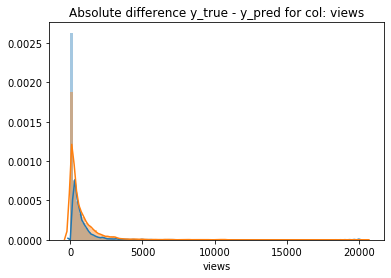

In [42]:
plot_differences_by_col(X_test, y_test, reg, price_df, 'views')

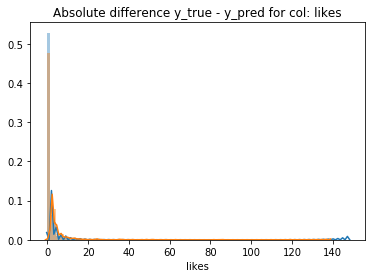

In [43]:
plot_differences_by_col(X_test, y_test, reg, price_df, 'likes')

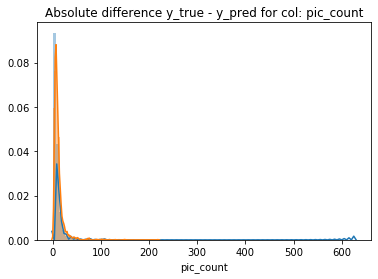

In [44]:
plot_differences_by_col(X_test, y_test, reg, price_df, 'pic_count')

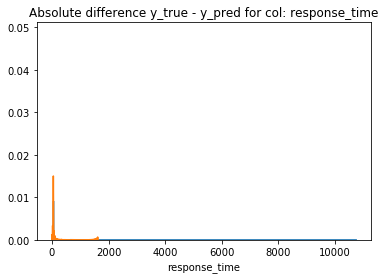

In [45]:
plot_differences_by_col(X_test, y_test, reg, price_df, 'response_time')

In [ ]:
plt.hist(price_df.iloc[test_index, :].views)

In [24]:
X[test_index]

array([[-0.0290568 ,  0.05075955,  0.01397061, ..., -0.07421875,
         0.13657555, -0.05031058],
       [ 0.02757635,  0.0171685 ,  0.02395583, ..., -0.04493256,
         0.10667419, -0.01665955],
       [ 0.03457642,  0.02633667,  0.02297401, ...,  0.02741699,
         0.09299316,  0.07979736],
       ...,
       [ 0.0224683 ,  0.02369427,  0.01443797, ...,  0.00985379,
         0.01337348,  0.02651978],
       [ 0.01900736, -0.07801649,  0.01028103, ..., -0.02549041,
         0.02916196, -0.05064151],
       [ 0.03240967,  0.02493564, -0.01016513, ..., -0.02396584,
         0.04564158,  0.01354472]])

In [22]:
(abs(y_test - reg.predict(X_test)) < 5).shape

(17244,)

In [43]:
from xgboost import XGBRFRegressor

In [44]:
# baseline including zero parameters
reg = XGBRFRegressor(random_state=42, n_jobs=8)

from gensim.test.utils import common_texts
from gensim.models import Phrases

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

#10-fold cross validation
kf = KFold(n_splits=3)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    reg.fit(X_train, y_train)
    
    print(mean_squared_error(y_test, reg.predict(X_test)) ** 0.5)

6.590640417849151
6.57737981882299
6.583215582367913


In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [51]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [67]:
from sklearn.manifold import TSNE

tsne_model = TSNE()

tsne_model.fit(X_test)

tsne_out = tsne_model.fit_transform(X_test)

tsne_target = y_test

plt.scatter(tsne_out[:, 0], tsne_out[:, 1], c=y_test)

In [45]:
test = [
    """
    You will get all files to print this Building. This Building is modular and has more as one ground-floor, floor and roof (see below). You can build more as 4 different buildings with this parts. Perfect for build a small german village (example for WWII). Includes all necessary STL files to print the model on your own 3D printer. (No physical model included with your order.)

This parts are included: (see on the Pictures) geroell_fix.stl gh1_1erdgesch_fix.stl gh1_1etage_fix.stl gh1_1etageruine_fix.stl gh1_2erdgesch_fix.stl gh1_2etage_fix.stl gh1_dach_fix.stl gh1_dachruine_fix.stl holzschuppen_fix.stl

Minimum printbed needed is 20 x 20 cm and 15 cm high. Scale is for 15mm Miniatures (approx 1/100) you can rescale it: Example Scale factor: 10mm = 66 % 15mm = 100 % 20mm = 133 % 28mm = 166 % If you need a printed Version, please write us a email. All files are not for commercial use!
""",
    """
    The Tribune Tower is a 462ft (141m) tall skyscraper in Chicago, Illinois. It was built in 1925 as the main offices of the Chicago Tribune newspaper. Its design famously came from a competition that attracted submissions from architects across the world. This is the winning design that went on to become one of Chicago's most famous and cherished buildings. It combines elements of both art deco and gothic architecture, featuring flying buttresses reminiscent of old cathedrals in its ornate crown. 
    """,
    """
    Industrial Building 3DPrint Ready Modeled in Maya 2018 Unit Files: cm Dimension: 65x20x20h 45 Files: L for Left; R for Right; x2 for number of it.
    """
]

new_X = np.array([get_avg(phrase, wv) for phrase in test])

In [48]:
reg.predict(new_X)

array([11.522016, 10.492709, 11.99557 ], dtype=float32)

Text(0.5, 1.0, 'Word2Vec RF Distrubtion of True Values and Predicted Values')

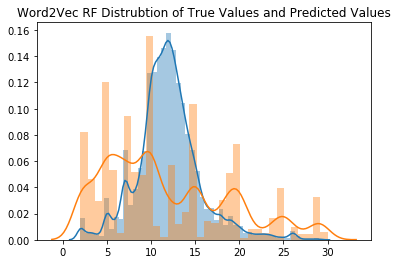

In [48]:
import seaborn as sns

fig, ax = plt.subplots()

sns.distplot(reg.predict(X_test), label='preds')
sns.distplot(y_test, label='true')
ax.set_title('Word2Vec RF Distrubtion of True Values and Predicted Values')

Text(0.5, 1.0, 'Residuals')

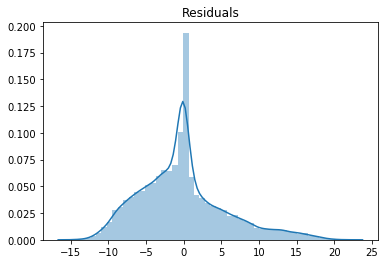

In [49]:
fig, ax = plt.subplots()

sns.distplot(y_test - reg.predict(X_test))
ax.set_title('Residuals')

In [35]:
mean_squared_error(y_test, reg.predict(X_test))**0.5

5.665296189284846

In [39]:
X_test

array([[-0.0290568 ,  0.05075955,  0.01397061, ..., -0.05697428,
         0.01972741, -0.0132765 ],
       [ 0.02757635,  0.0171685 ,  0.02395583, ..., -0.04496374,
         0.01466174, -0.00770555],
       [ 0.03457642,  0.02633667,  0.02297401, ..., -0.03019714,
        -0.03771973,  0.02318954],
       ...,
       [ 0.0224683 ,  0.02369427,  0.01443797, ..., -0.04486505,
         0.00914541, -0.04135868],
       [ 0.01900736, -0.07801649,  0.01028103, ..., -0.01541477,
         0.00968424,  0.05556149],
       [ 0.03240967,  0.02493564, -0.01016513, ..., -0.0822532 ,
        -0.03962846, -0.04723566]])

array([34488, 34489, 34490, ..., 51729, 51730, 51731])

In [52]:
from collections import Counter

c = Counter()
d = Counter()

for x in price_df.iloc[test_index,:][abs(y_test - reg.predict(X_test)) < 5].model_description:
    c.update(x.split(' '))
    
for x in price_df.iloc[test_index,:][abs(y_test - reg.predict(X_test)) > 5].model_description:
    d.update(x.split(' '))

In [76]:
key_intersection_differences = []
keys = []
for key in set(c.keys()).difference(set(d.keys())):
    key_intersection_differences.append(c[key] - d[key])
    keys.append(key)

In [77]:
list(zip(key, key_intersection_differences))

[('3', 5), ('5', 3), ('c', 1), ('m', 1), (')', 1), ('.', 1)]

In [79]:
import gensim

model = gensim.models.Word2Vec(
    df.model_description,
    size=150,
    window=10,
    min_count=2,
    workers=10, 
    iter=10)
    

52907

In [54]:
d.most_common()

[('', 29721),
 ('and', 10815),
 ('the', 8010),
 ('in', 6566),
 ('for', 5619),
 ('with', 5314),
 ('of', 5173),
 ('is', 4988),
 ('to', 4923),
 ('model', 4412),
 ('a', 3899),
 ('are', 3659),
 ('-', 3440),
 ('you', 2584),
 ('The', 2406),
 ('textures', 2321),
 ('or', 1903),
 ('materials', 1780),
 ('3ds', 1675),
 ('can', 1672),
 ('3D', 1612),
 ('be', 1539),
 ('All', 1438),
 ('This', 1418),
 ('file', 1411),
 ('on', 1336),
 ('your', 1323),
 ('Model', 1310),
 ('Max', 1308),
 ('3d', 1283),
 ('have', 1205),
 ('models', 1176),
 ('as', 1102),
 ('all', 1083),
 ('not', 1070),
 ('x', 1065),
 ('max', 1011),
 ('included', 981),
 ('it', 929),
 ('any', 925),
 ('by', 918),
 ('this', 918),
 ('FBX', 862),
 ('use', 851),
 (':', 850),
 ('No', 842),
 ('has', 841),
 ('ready', 836),
 ('Textures', 819),
 ('texture', 819),
 ('that', 818),
 ('scene', 796),
 ('poly', 795),
 ('other', 764),
 ('used', 760),
 ('rendered', 758),
 ('quality', 756),
 ('OBJ', 734),
 ('/', 724),
 ('V-Ray', 710),
 ('from', 706),
 ('PBR', 680)

In [29]:
reg.predict(new_X)

array([10.85395897, 10.42256667, 12.32993333])